In [1]:
import pandas as pd
import numpy as np
import random

# Set seed for reproducibility
np.random.seed(42)

# Word banks
urgency_words = ["limited", "now", "last chance", "urgent", "today only", "final hours"]
personalization_words = ["{first_name}", "you", "your", "for you", "just for"]
neutral_phrases = ["weekly update", "productivity tips", "check this out", "new blog", "don’t miss"]

# Generate subject lines
def generate_subject():
    has_urgency = np.random.choice([0, 1], p=[0.6, 0.4])
    has_personalization = np.random.choice([0, 1], p=[0.5, 0.5])
    base = random.choice(neutral_phrases)

    subject = base
    if has_urgency:
        subject = random.choice(urgency_words) + " - " + subject
    if has_personalization:
        subject = random.choice(personalization_words) + " " + subject

    return subject, has_urgency, has_personalization

# Simulate 500 emails
data = []
for _ in range(500):
    subject, urgency, personalization = generate_subject()
    subject_length = len(subject)
    word_count = len(subject.split())
    # Simple rule: urgency and personalization boost open probability
    open_prob = 0.1 + 0.2 * urgency + 0.2 * personalization + np.random.normal(0, 0.05)
    email_opened = int(open_prob > 0.4)

    data.append([subject, urgency, personalization, subject_length, word_count, email_opened])

df = pd.DataFrame(data, columns=[
    "Subject", "Has_Urgency", "Has_Personalization", "Subject_Length", "Word_Count", "Email_Opened"
])

df.head()


,Subject,Has_Urgency,Has_Personalization,Subject_Length,Word_Count,Email_Opened
0,just for don’t miss,0,1,19,4,0
1,don’t miss,0,0,10,2,0
2,you weekly update,0,1,17,3,0
3,for you new blog,0,1,16,4,0
4,today only - check this out,1,0,27,6,0


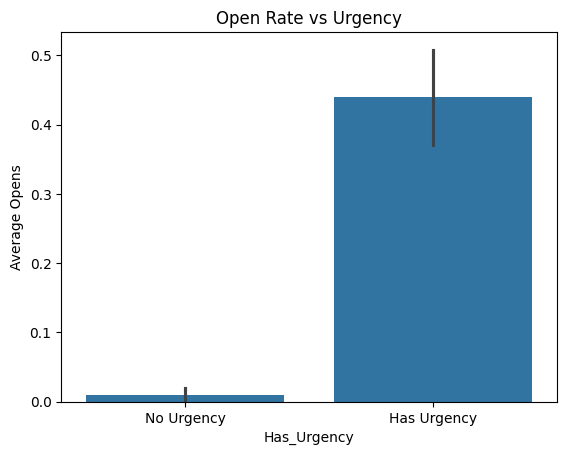

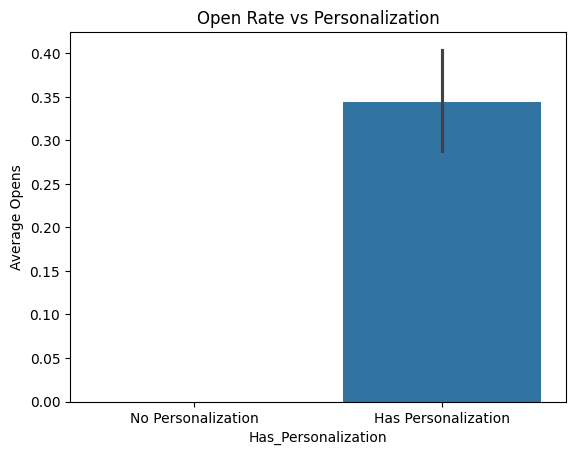

ValueError: could not convert string to float: 'just for don’t miss'

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Open Rate by Urgency
sns.barplot(data=df, x='Has_Urgency', y='Email_Opened')
plt.title('Open Rate vs Urgency')
plt.xticks([0, 1], ['No Urgency', 'Has Urgency'])
plt.ylabel('Average Opens')
plt.show()

# Open Rate by Personalization
sns.barplot(data=df, x='Has_Personalization', y='Email_Opened')
plt.title('Open Rate vs Personalization')
plt.xticks([0, 1], ['No Personalization', 'Has Personalization'])
plt.ylabel('Average Opens')
plt.show()

# Correlation Heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define features and label
X = df[['Has_Urgency', 'Has_Personalization', 'Subject_Length', 'Word_Count']]
y = df['Email_Opened'] > 0  # Binary: Opened at least once or not

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[85  0]
 [ 0 15]]

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00        85
        True       1.00      1.00      1.00        15

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [4]:
def recommend_words(row):
    suggestions = []
    if row['Has_Urgency'] == 0:
        suggestions.append(random.choice(urgency_words))
    if row['Has_Personalization'] == 0:
        suggestions.append(random.choice(personalization_words))
    return suggestions

df['Word_Suggestions'] = df.apply(recommend_words, axis=1)
df[['Subject', 'Email_Opened', 'Word_Suggestions']].head()


,Subject,Email_Opened,Word_Suggestions
0,just for don’t miss,0,[today only]
1,don’t miss,0,"[today only, {first_name}]"
2,you weekly update,0,[last chance]
3,for you new blog,0,[urgent]
4,today only - check this out,0,[just for]


In [17]:
# Just make sure you already ran your model training and have 'model' in memory

from textblob import TextBlob

# Word banks
urgency_words = ["limited", "now", "last chance", "urgent", "today only", "final hours"]
personalization_words = ["{first_name}", "you", "your", "for you", "just for"]

# Feature extraction function
def extract_features(subject):
    subject = subject.lower()
    has_urgency = any(word in subject for word in urgency_words)
    has_personalization = any(word in subject for word in personalization_words)
    subject_length = len(subject)
    word_count = len(subject.split())
    return [int(has_urgency), int(has_personalization), subject_length, word_count]

# Suggestion function
def recommend(subject):
    suggestions = []
    if not any(word in subject for word in urgency_words):
        suggestions.append("💡 Try adding urgency: " + random.choice(urgency_words))
    if not any(word in subject for word in personalization_words):
        suggestions.append("💡 Try adding personalization: " + random.choice(personalization_words))
    return suggestions

# Simulate the app experience
def test_subject_line():
    subject = input("📨 Enter your subject line: ").strip()
    if not subject:
        print("❗Please enter a valid subject line.")
        return

    features = extract_features(subject)
    prob = model.predict_proba([features])[0][1]
    print(f"\n📊 Predicted open probability: {prob:.2f}")

    suggestions = recommend(subject)
    if suggestions:
        print("\n🔧 Suggestions to improve:")
        for s in suggestions:
            print(s)
    else:
        print("✅ Your subject line already includes urgency and personalization!")

# Run the test
test_subject_line()


📨 Enter your subject line: for you: exclusive early access inside

📊 Predicted open probability: 0.65

🔧 Suggestions to improve:
💡 Try adding urgency: final hours


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
